In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

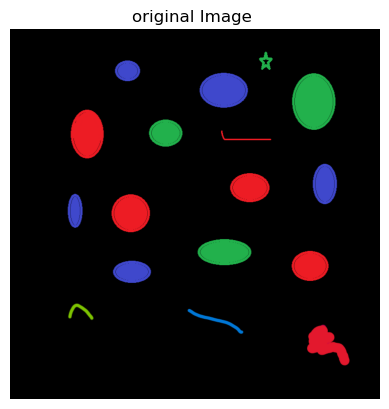

In [13]:
# Load the image
image = cv2.imread("assignmentpic.jpg")

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image_rgb)
plt.axis('off') 
plt.title("original Image ")
plt.show()

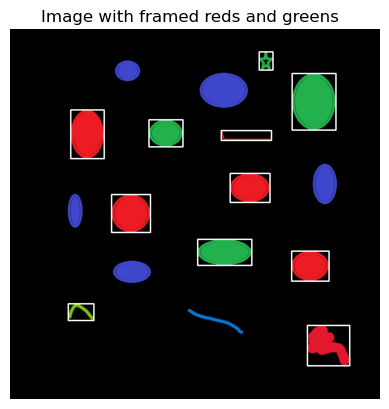

In [14]:




# Convert the RGB image to HSV color space
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Define the lower and upper bounds for red hues
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Define the lower and upper bounds for green hues
lower_green = np.array([36, 25, 25])
upper_green = np.array([86, 255, 255])

# Threshold the HSV image to get only red and green regions
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)


# Combine the masks
red_mask = cv2.bitwise_or(red_mask1, red_mask2)
combined_mask = cv2.bitwise_or(red_mask, green_mask)

# Find contours in the combined mask
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Draw white rectangles around the parts of the image whose hue values are red or green
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 255, 255), 2)

# Display the result 
plt.imshow(image_rgb)
# plt.imshow(cv2.cvtColor(red_mask2,cv2.COLOR_BGR2RGB))# plt show the mask in a different color map
# plt.imshow(combined_mask,cmap="gray") # plt show the mask in a different color map
plt.title("Image with framed reds and greens  ")
plt.axis('off') 
plt.show()
